In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

# hide warning about too many plots
plt.rcParams.update({'figure.max_open_warning': 0})


In [2]:
# read data and check
df = pd.read_csv('diabetes.data', sep='\s+')
df.head()


AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

# Basic: using diabetes.data, regenerate a ton of figures (> 50) showing data with at least 3+ features at a time

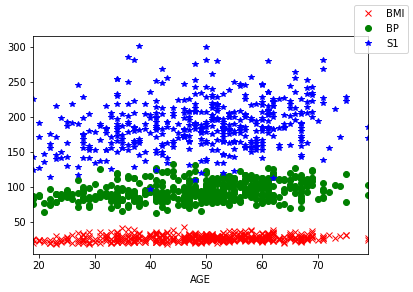

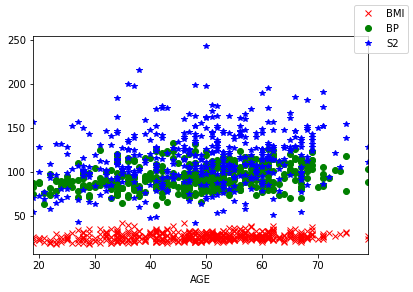

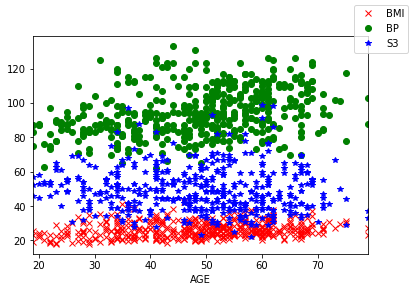

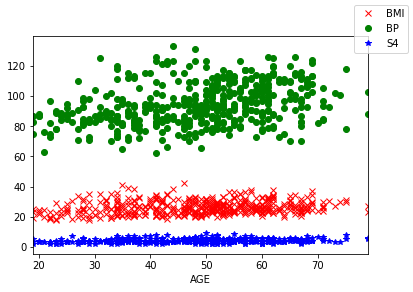

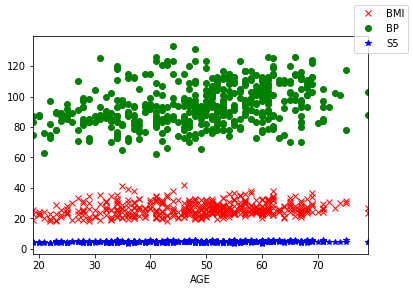

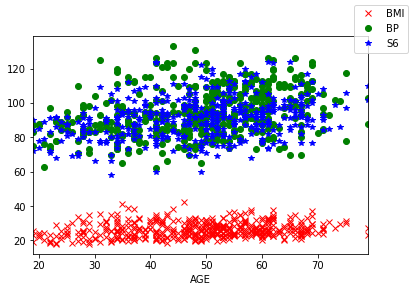

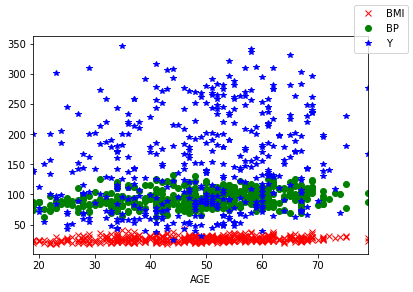

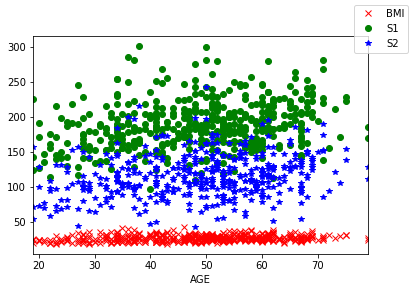

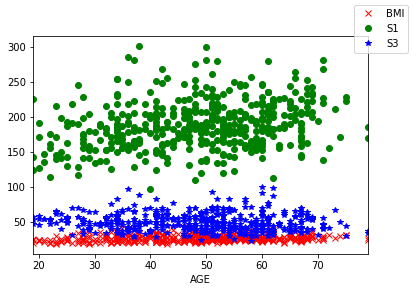

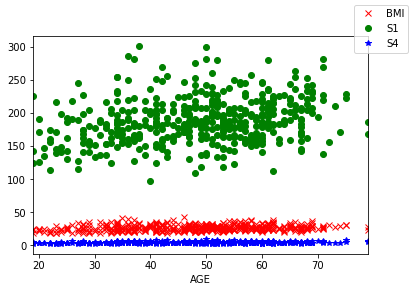

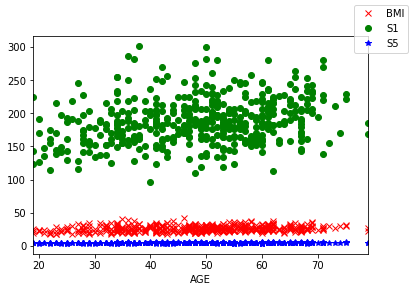

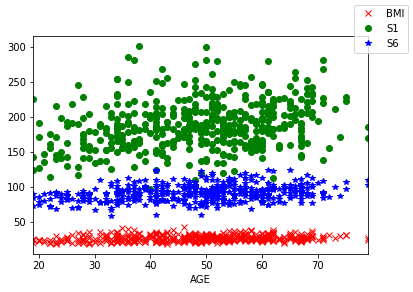

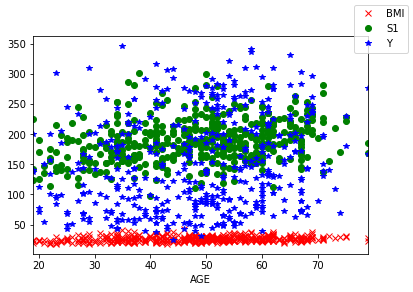

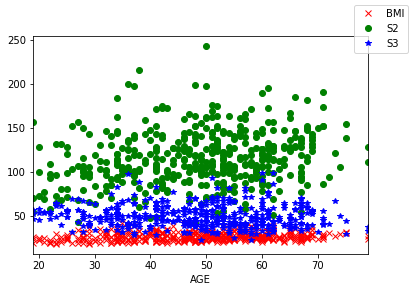

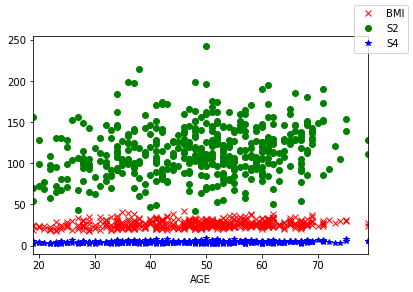

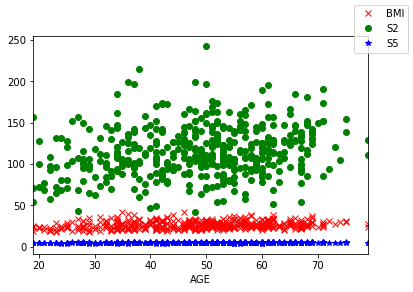

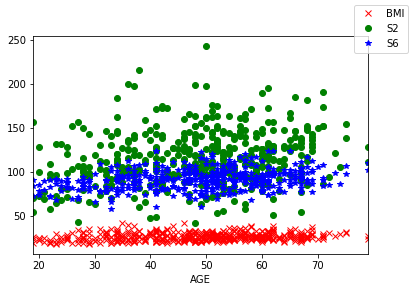

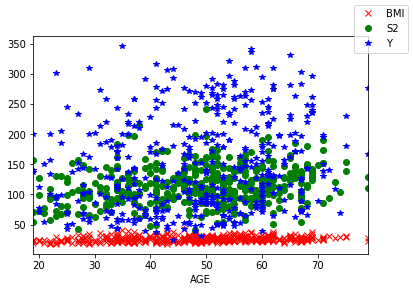

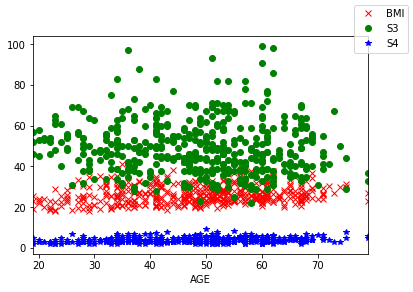

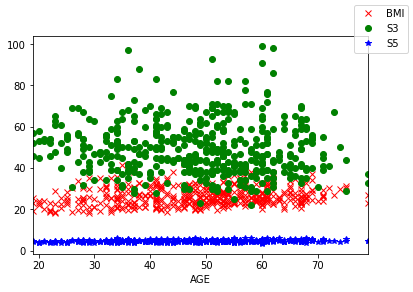

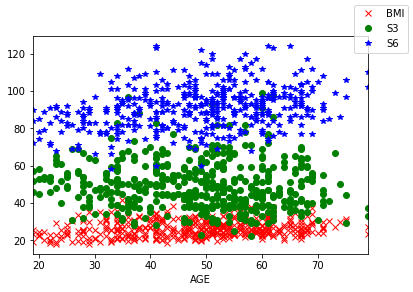

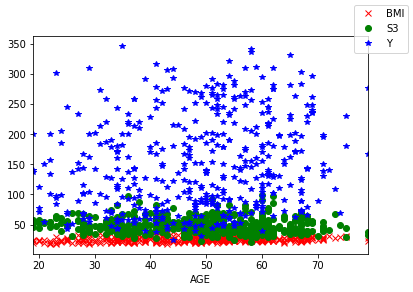

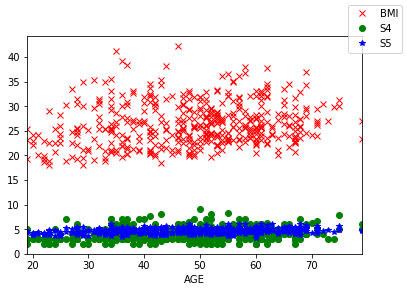

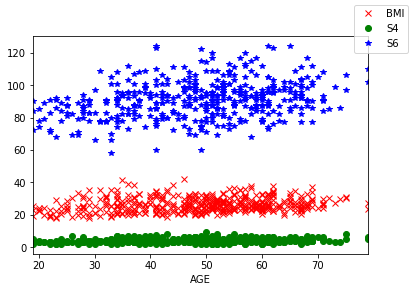

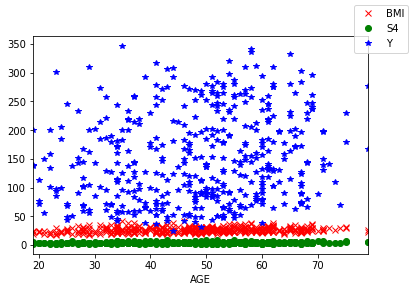

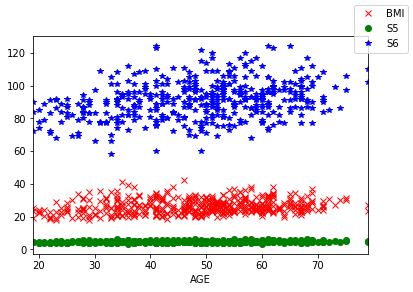

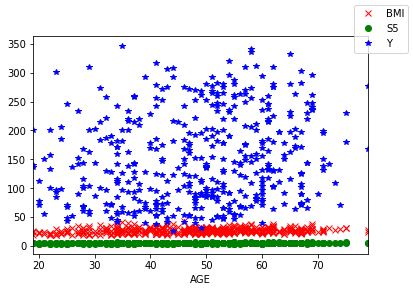

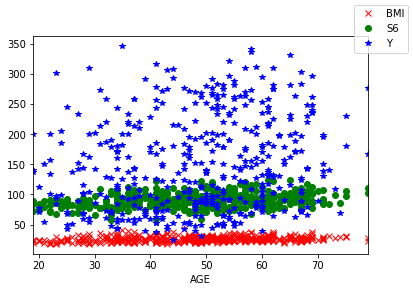

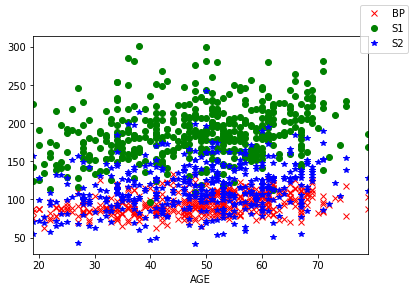

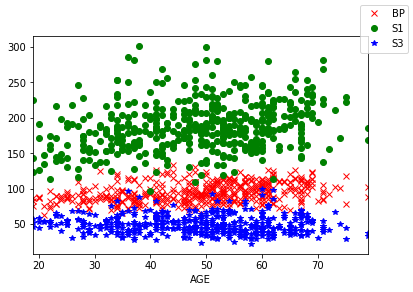

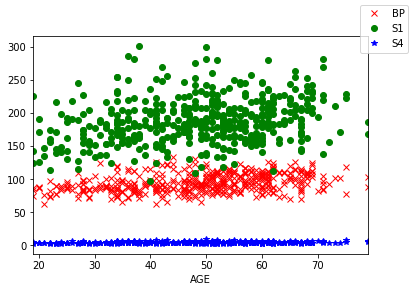

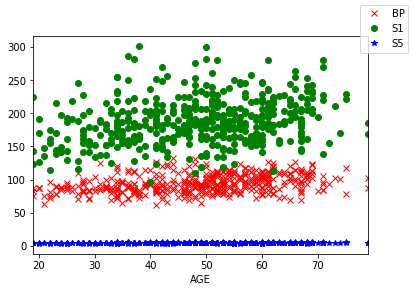

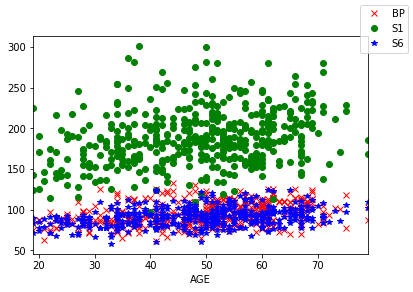

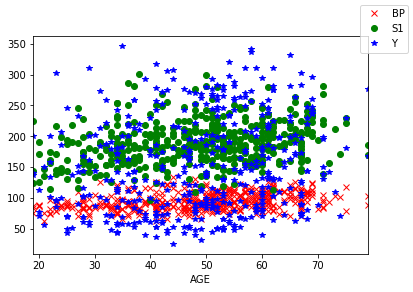

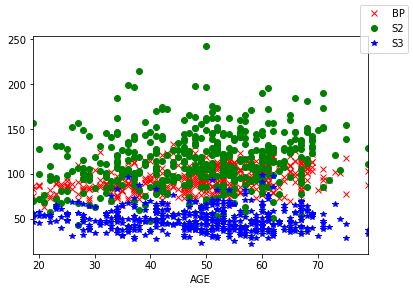

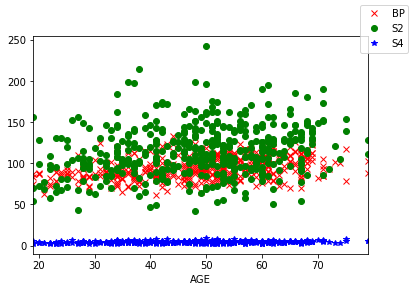

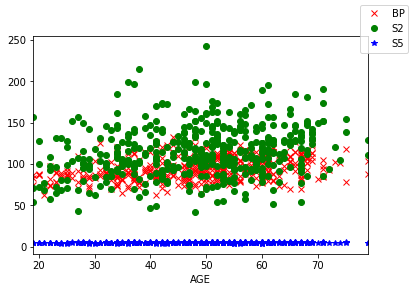

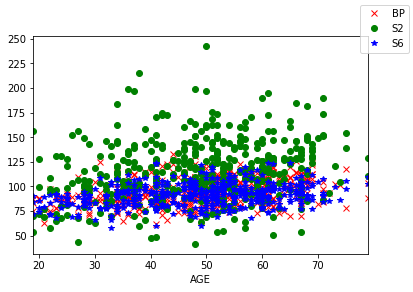

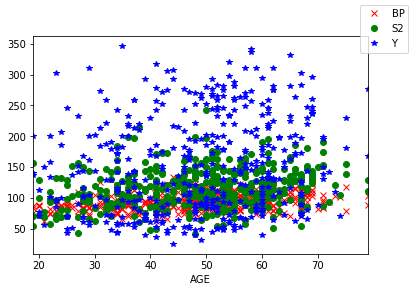

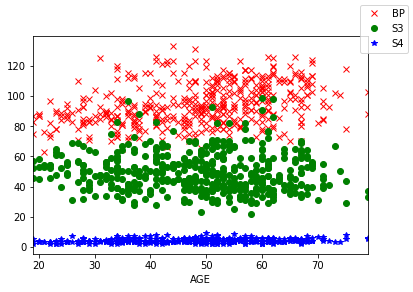

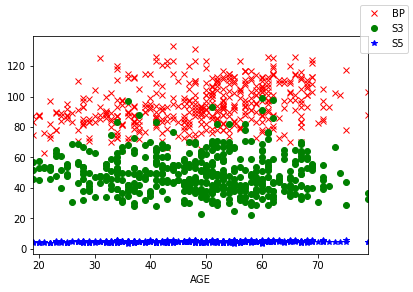

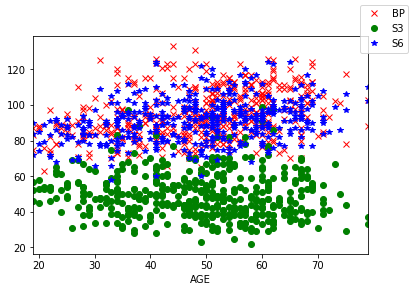

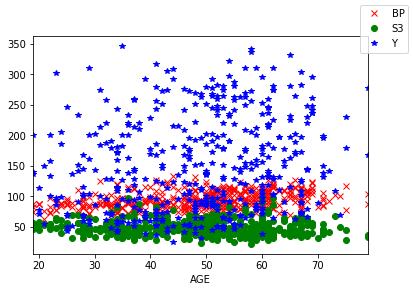

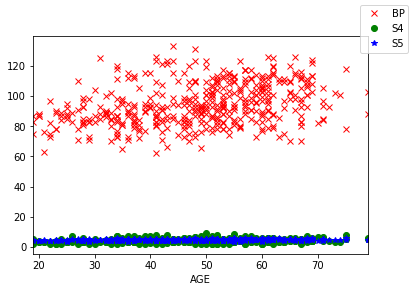

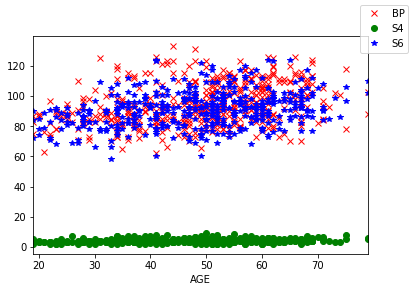

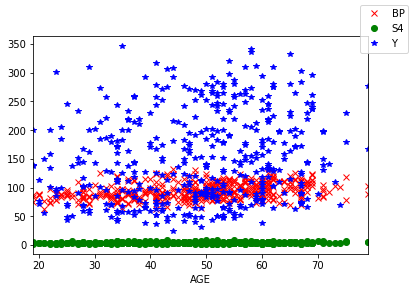

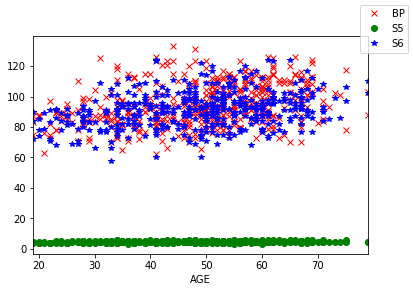

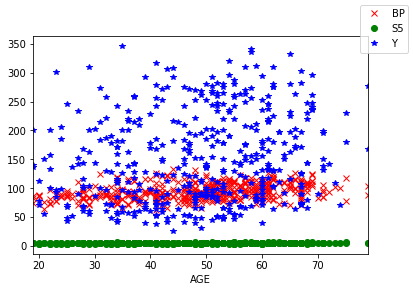

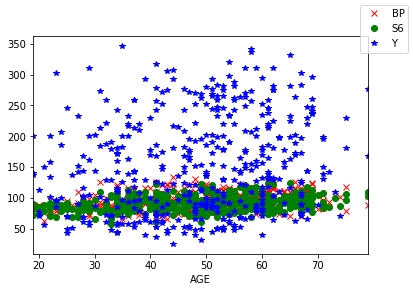

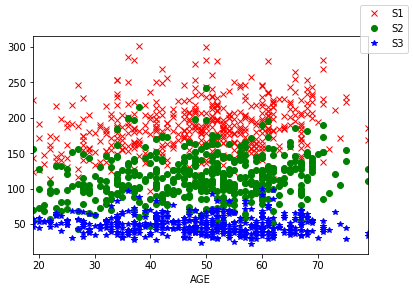

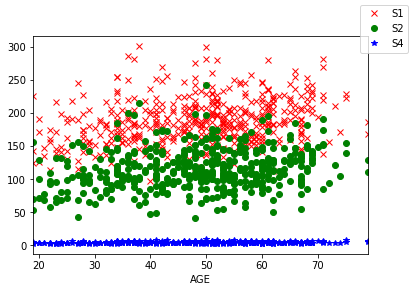

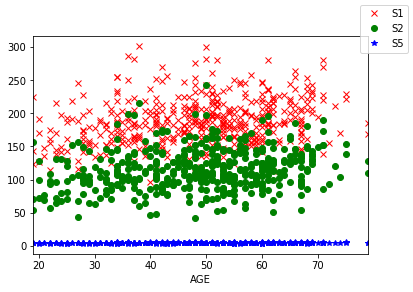

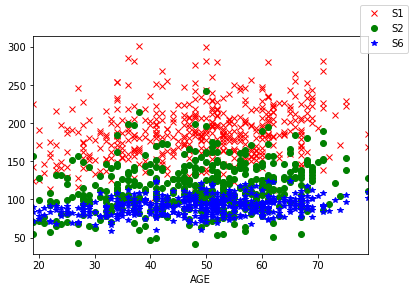

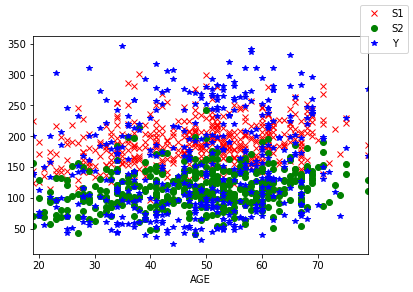

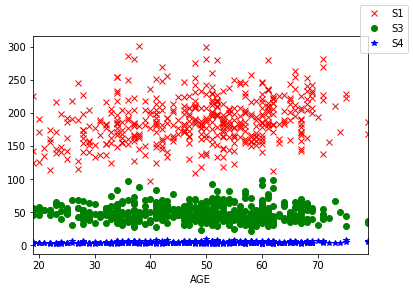

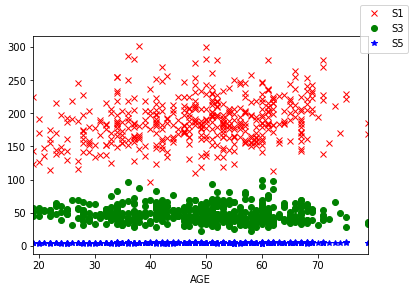

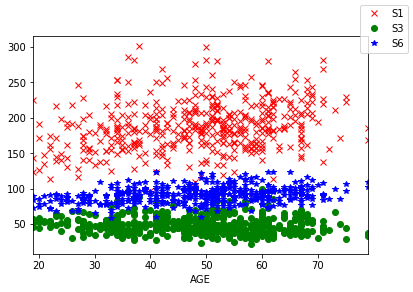

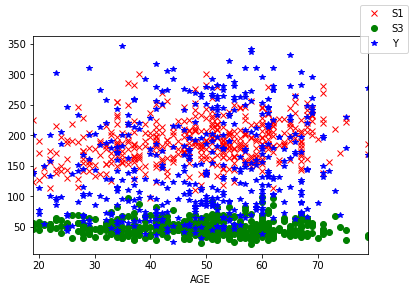

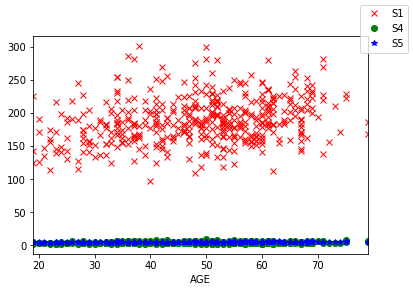

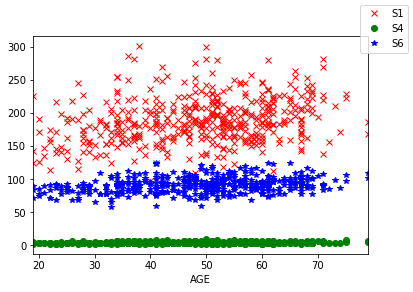

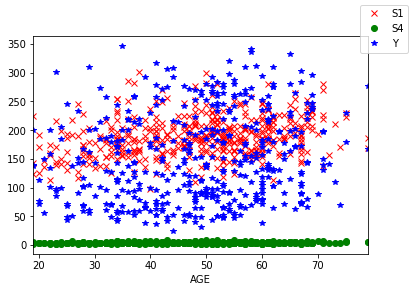

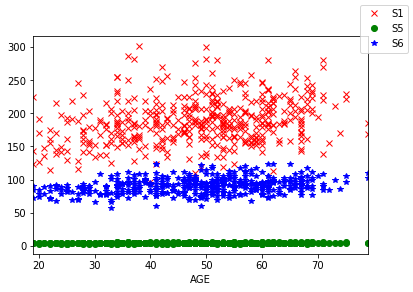

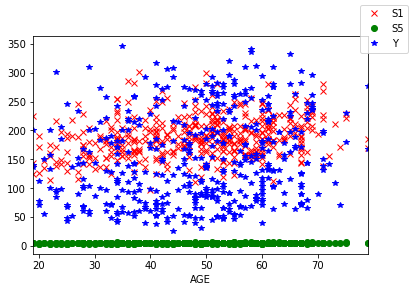

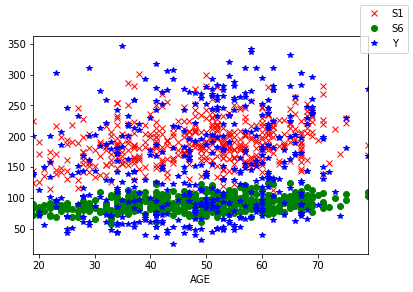

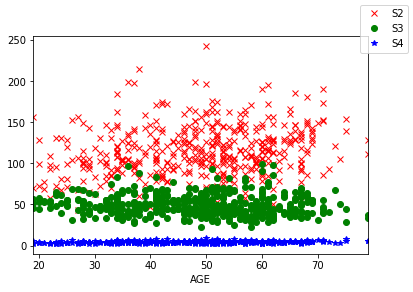

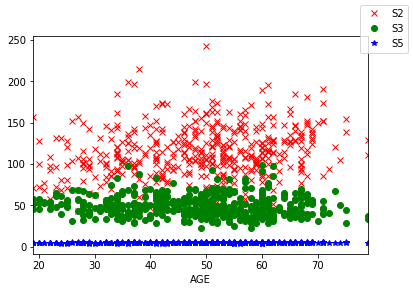

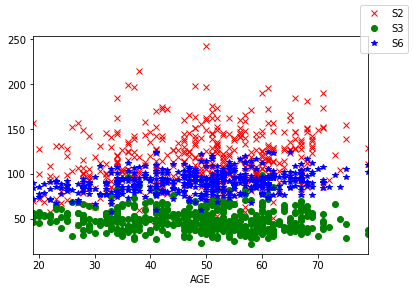

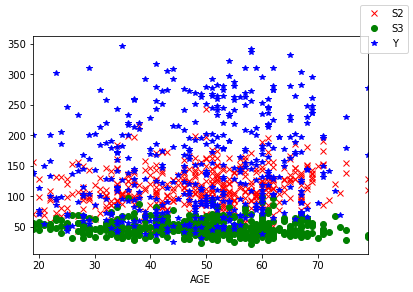

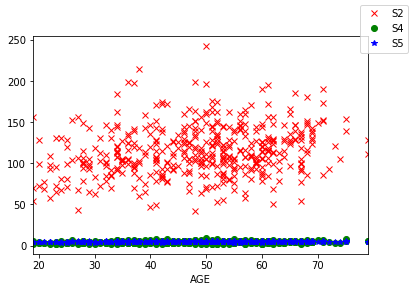

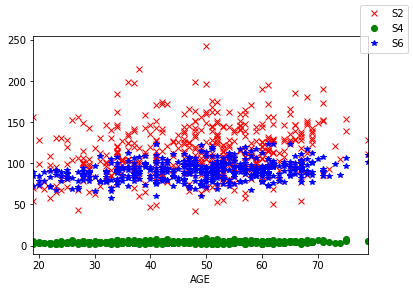

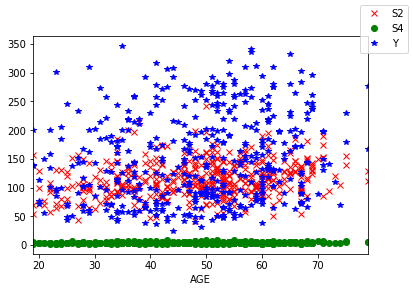

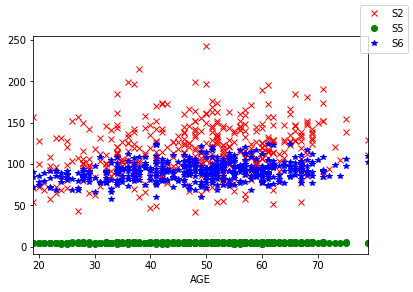

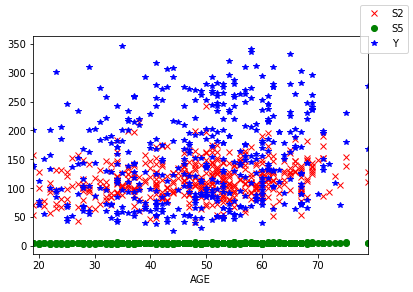

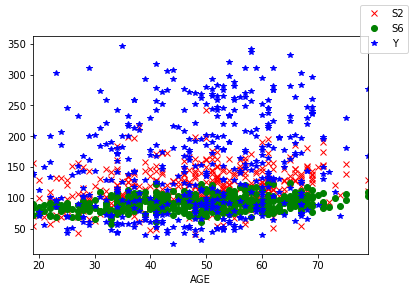

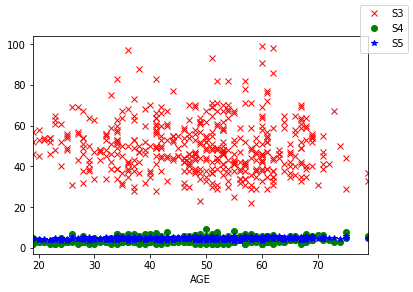

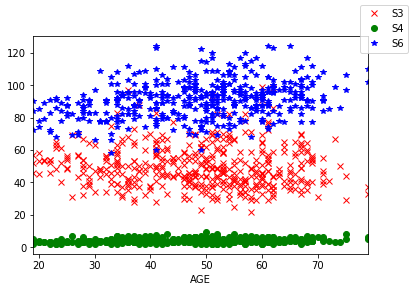

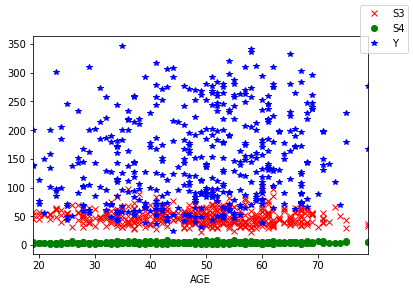

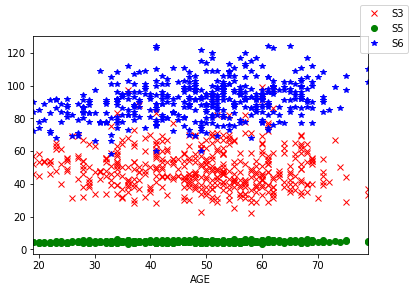

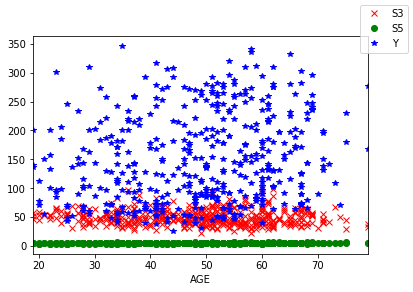

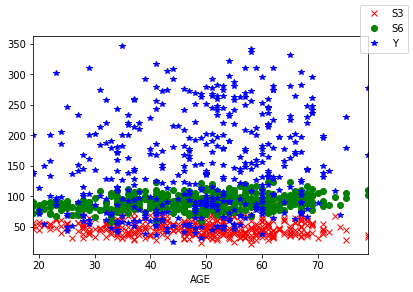

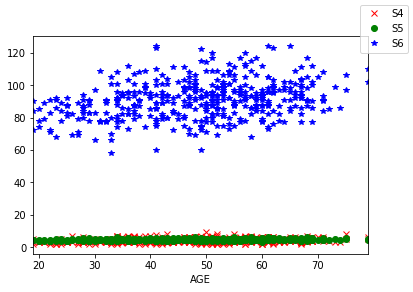

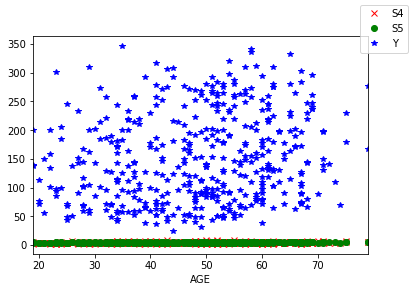

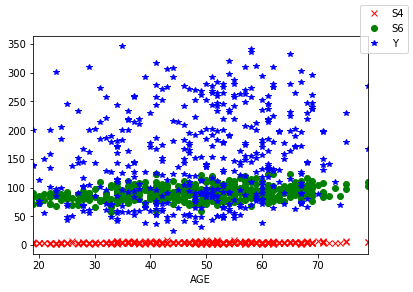

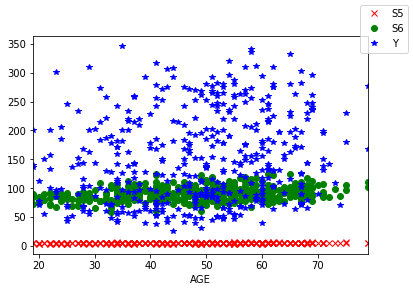

total number of plots 84


In [3]:
num_plots = 0
for col0, col1, col2 in list(itertools.combinations(df.columns, 3)):
    # exclude SEX since it doesn't plot well in line plots and plot AGE on X axis to reduce number of plots
    if col0!='SEX' and col1!='SEX' and col2!='SEX' and col0!='AGE' and col1!='AGE' and col2!='AGE':
        ax = df.plot(       x='AGE', y=col0,  color='r', linestyle='none',  marker='x', legend=False, grid=False)
        ax = df.plot(ax=ax, x='AGE', y=col1,  color='g',  linestyle='none',  marker='o', legend=False,grid=False)
        ax = df.plot(ax=ax, x='AGE', y=col2,  color='b',  linestyle='none',  marker='*', legend=False,grid=False)
        ax.figure.legend()
        plt.show()
        num_plots = num_plots + 1

print ('total number of plots ' + str(num_plots))


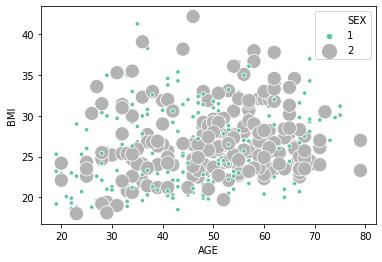

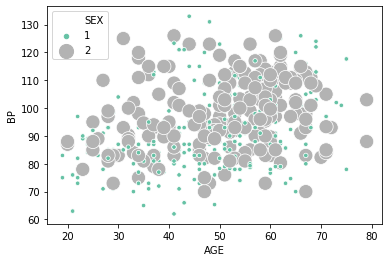

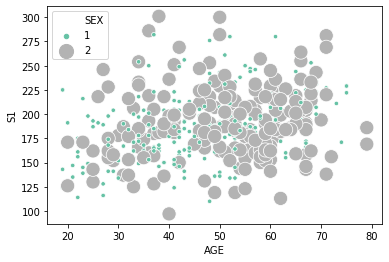

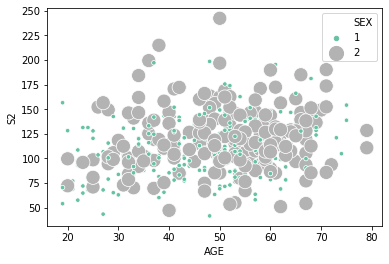

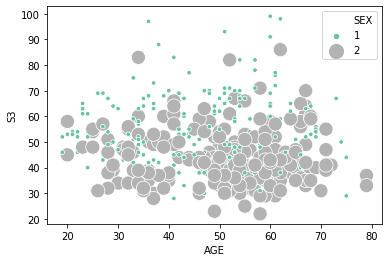

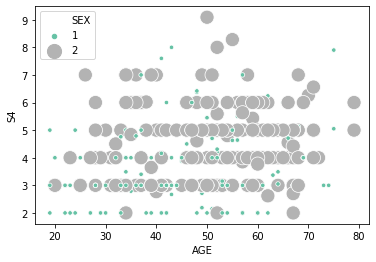

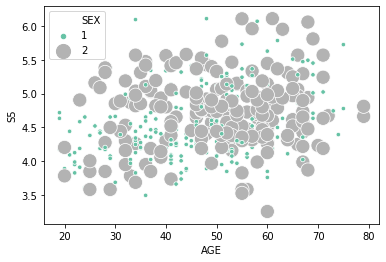

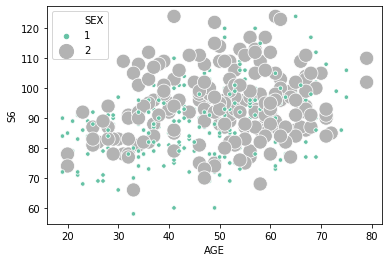

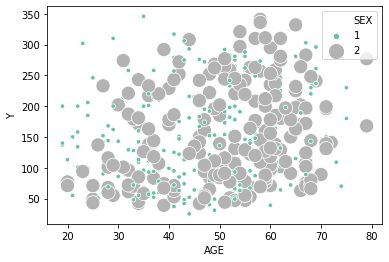

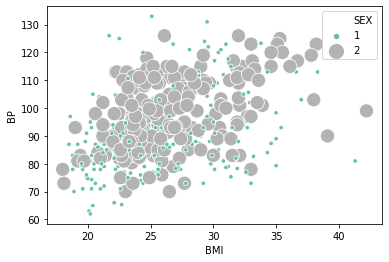

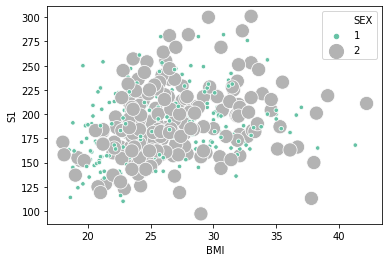

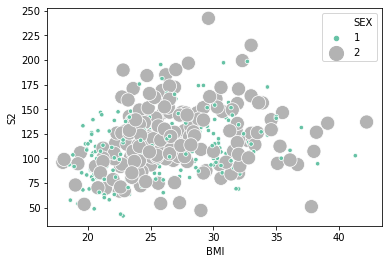

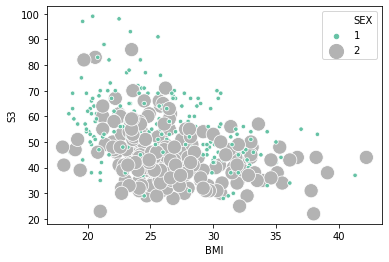

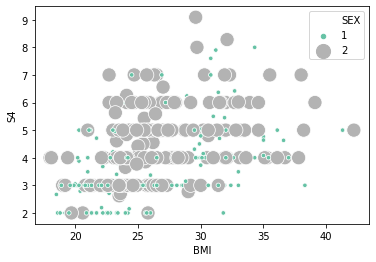

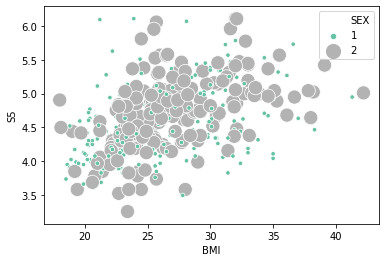

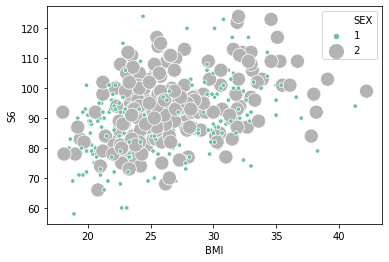

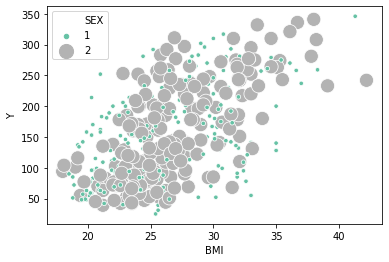

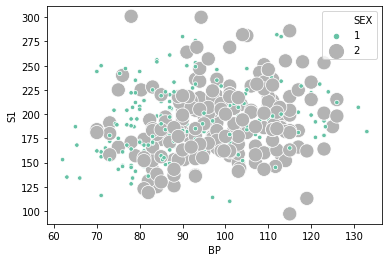

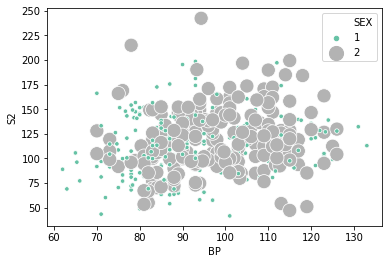

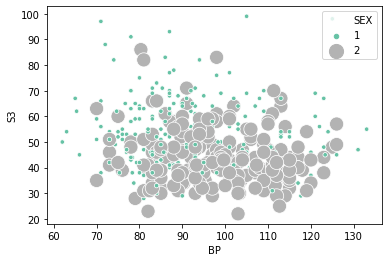

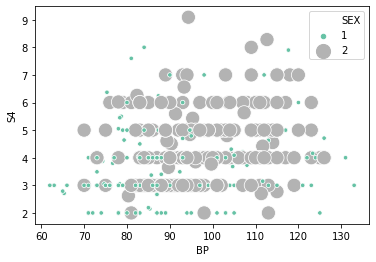

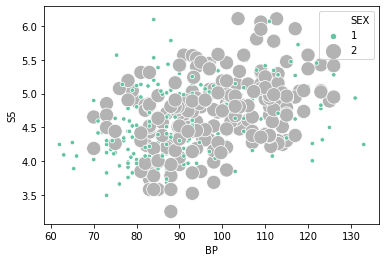

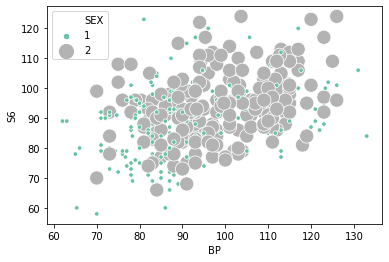

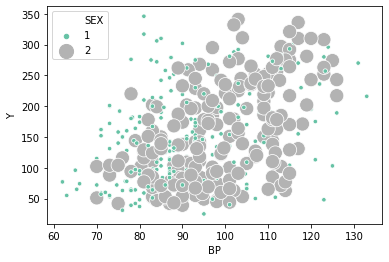

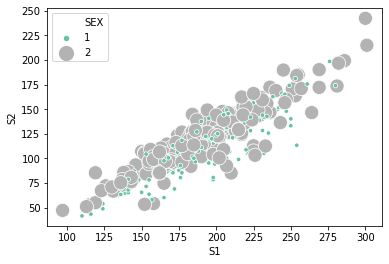

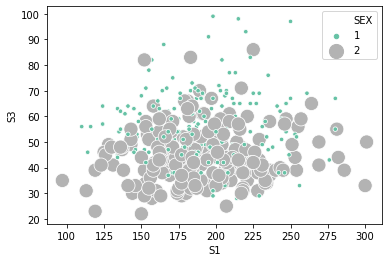

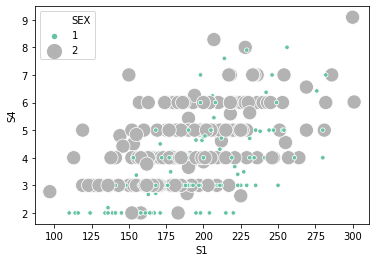

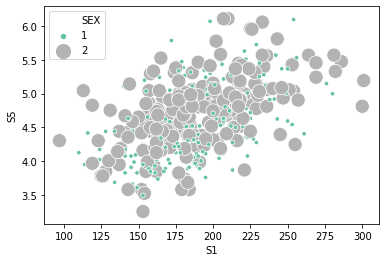

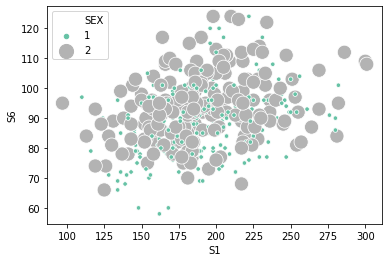

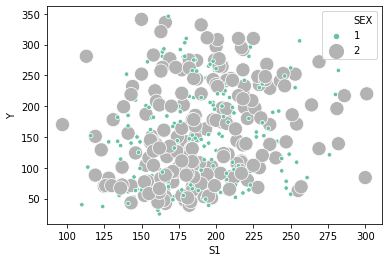

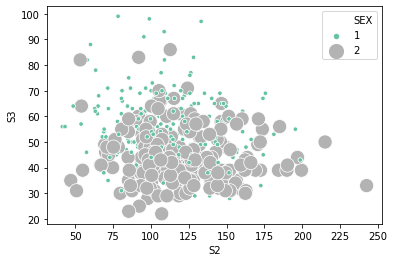

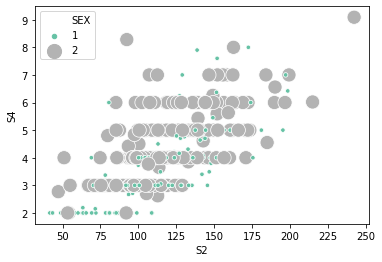

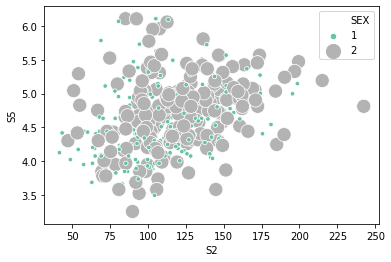

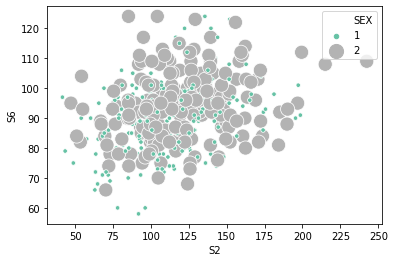

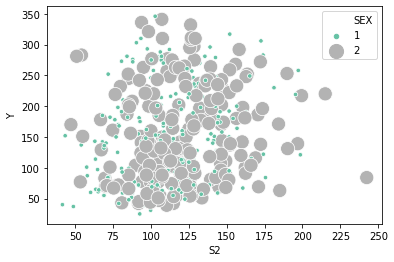

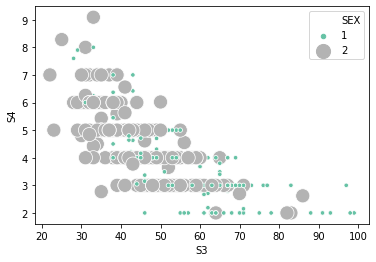

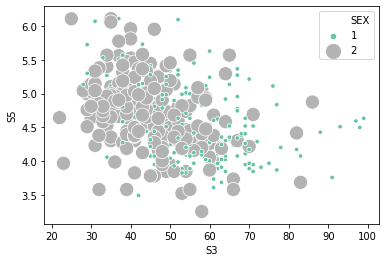

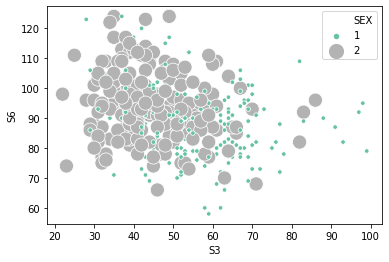

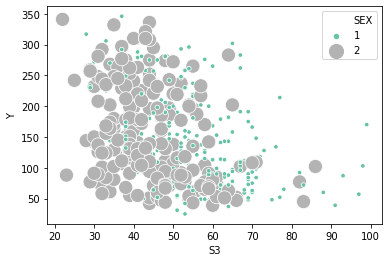

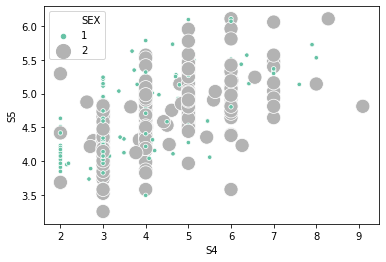

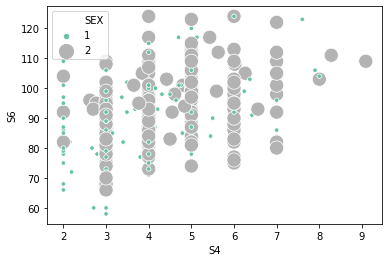

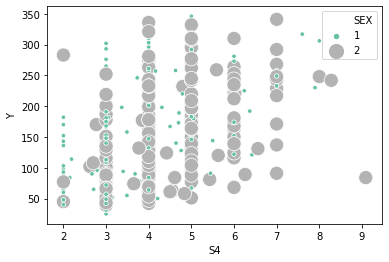

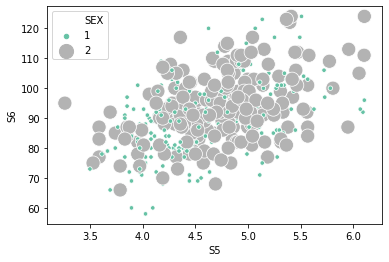

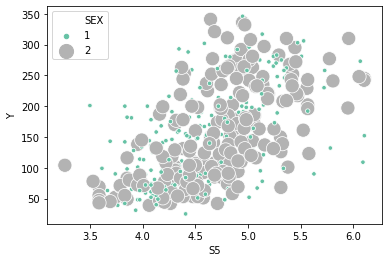

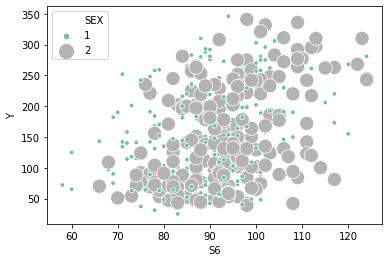

total num plots 45


In [4]:
num_plots = 0

for col1, col2 in list(itertools.combinations(df.columns, 2)):
    if col1!='SEX' and col2!='SEX':
        ax = sns.scatterplot(x=col1, y=col2,
                      hue='SEX',
                      size='SEX',
                      palette="Set2",
                      sizes=(20, 200),
                      legend="full", data=df)
        plt.show()
        num_plots = num_plots + 1

print ('total num plots ' + str(num_plots))


total num plots 45


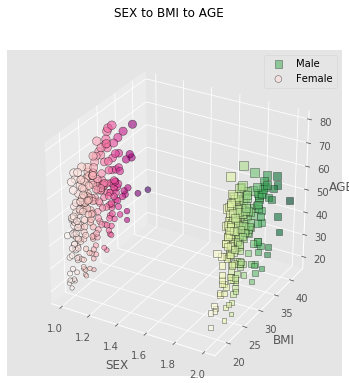

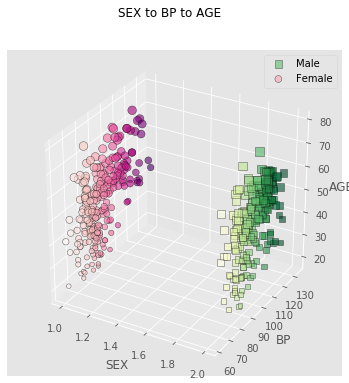

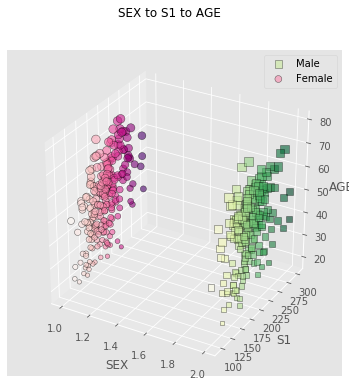

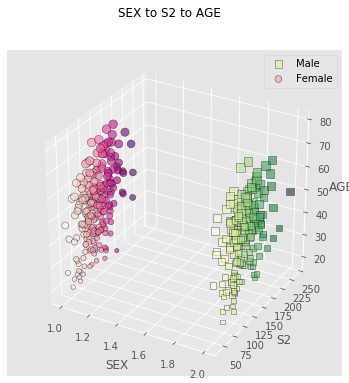

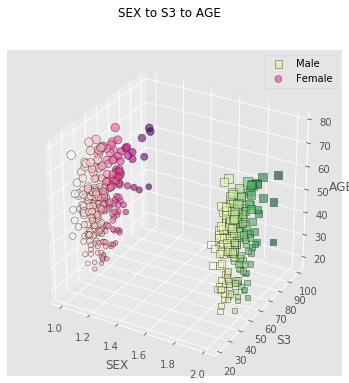

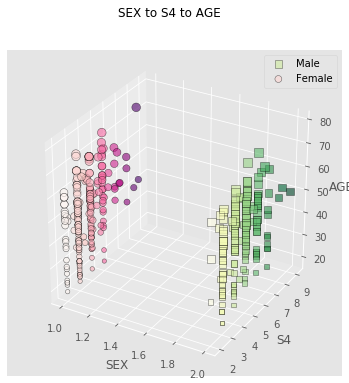

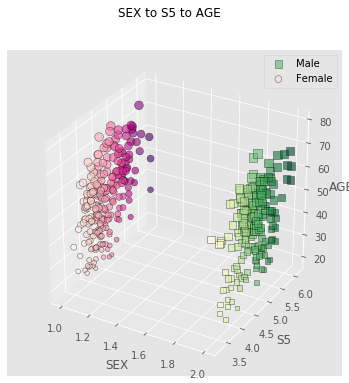

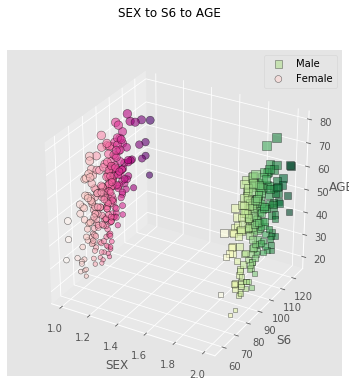

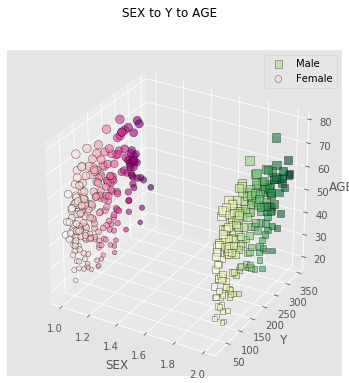

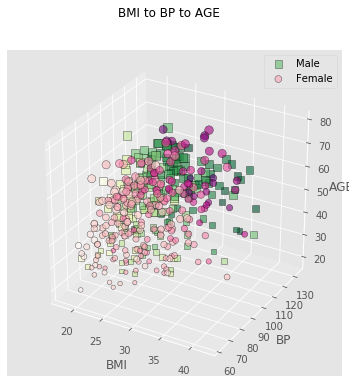

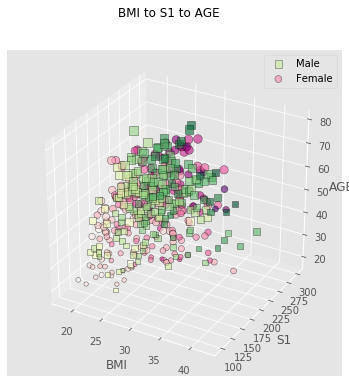

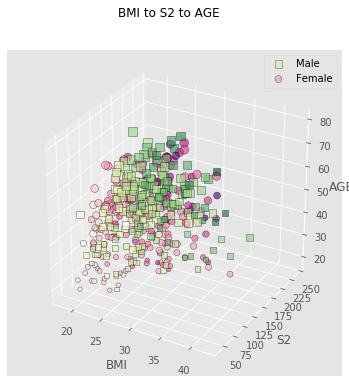

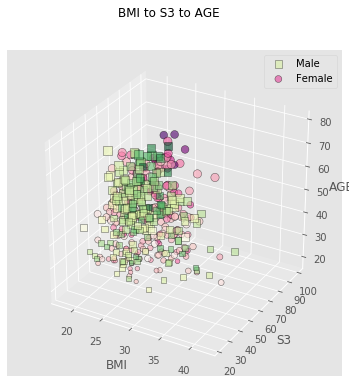

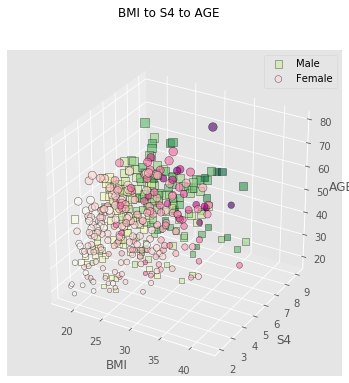

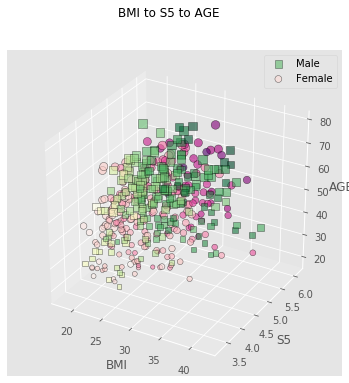

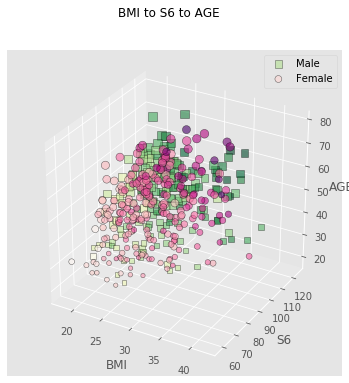

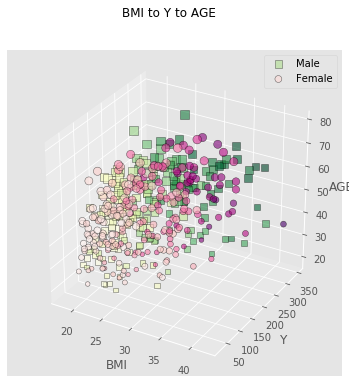

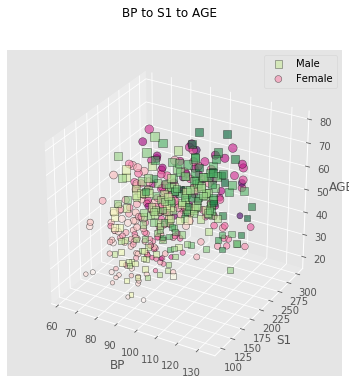

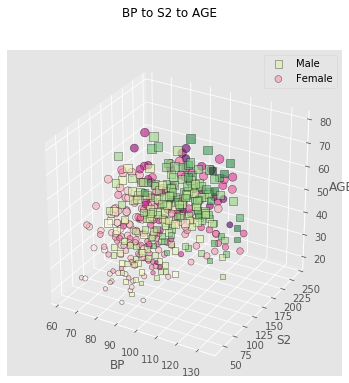

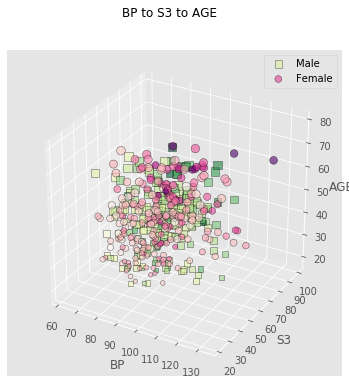

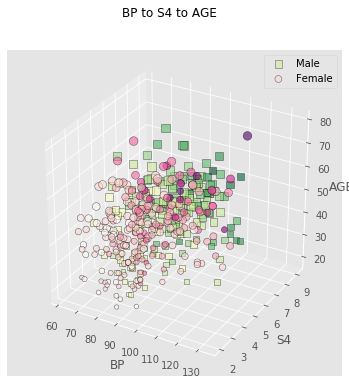

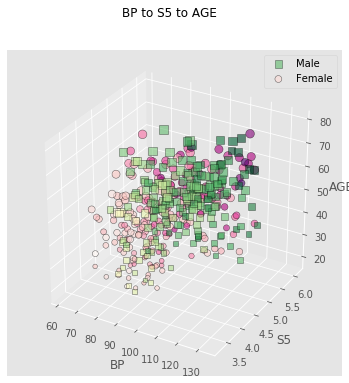

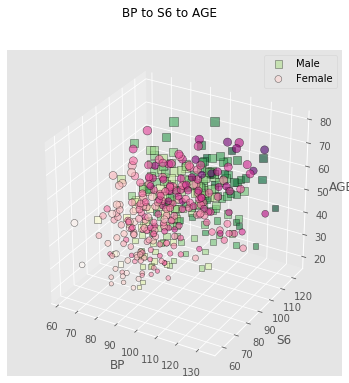

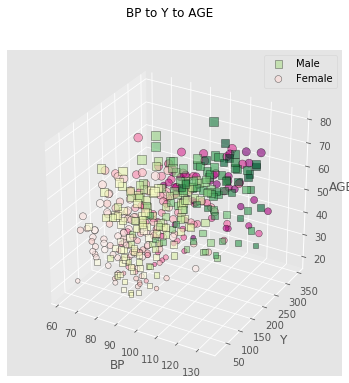

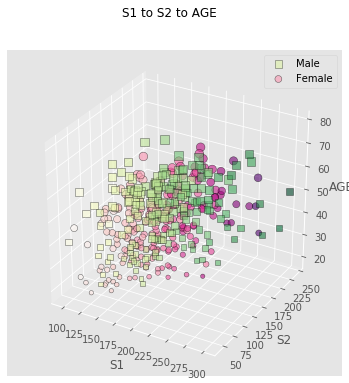

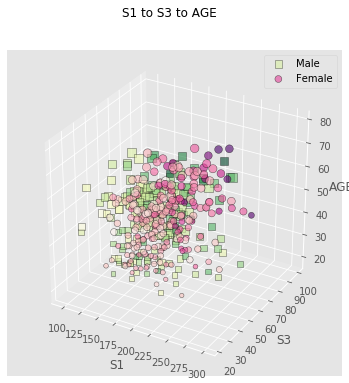

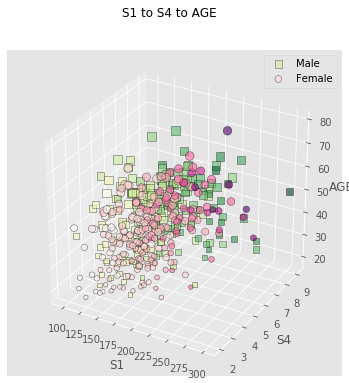

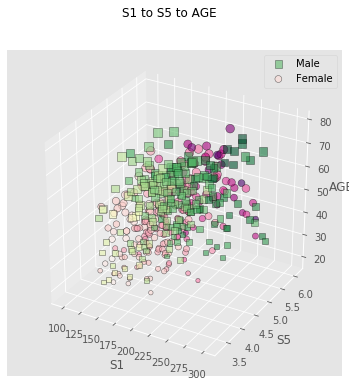

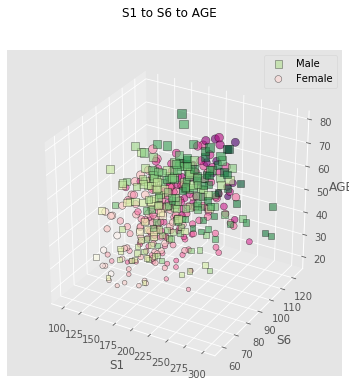

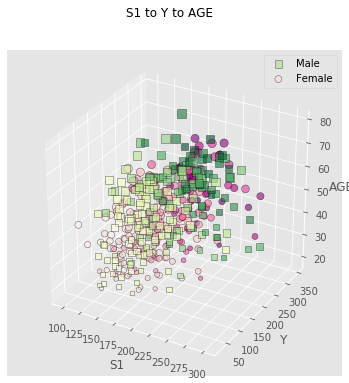

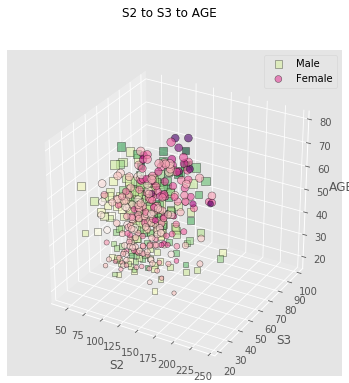

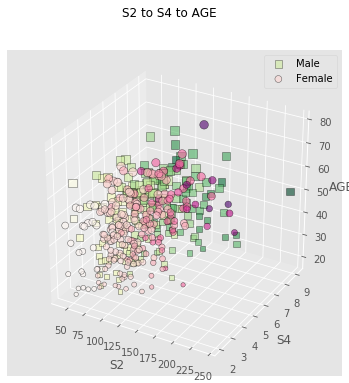

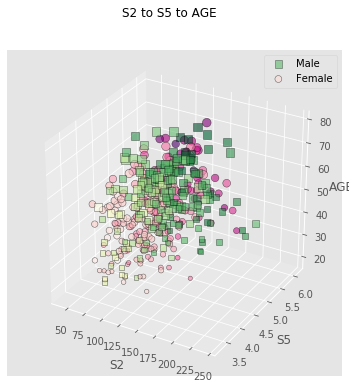

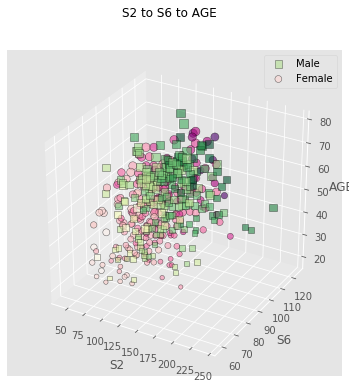

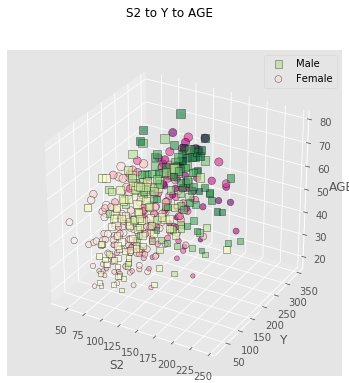

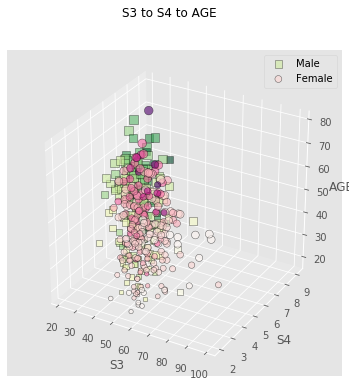

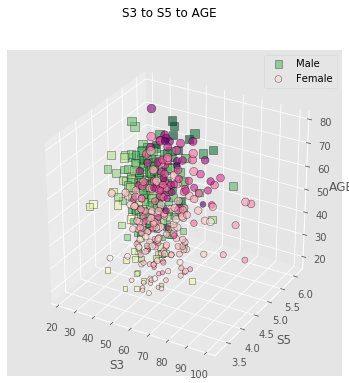

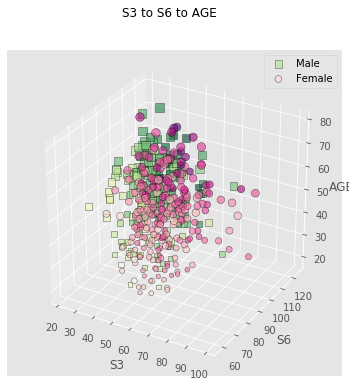

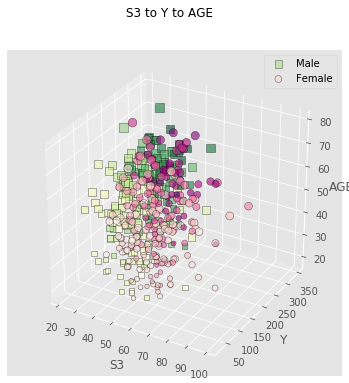

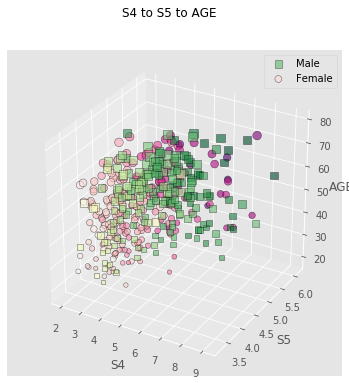

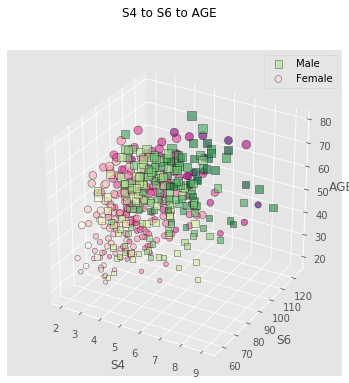

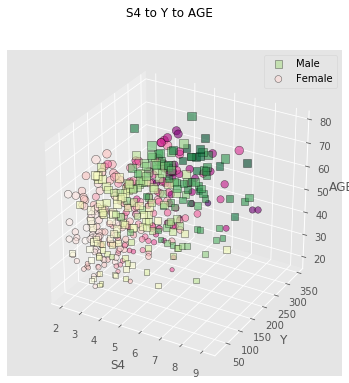

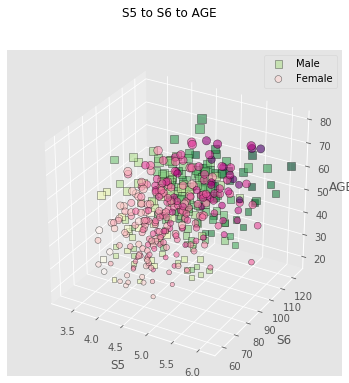

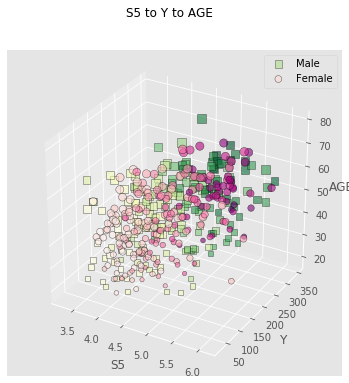

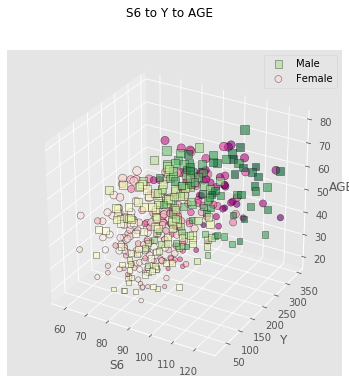

In [7]:
num_plots = 0
plt.style.use("ggplot")

m_df = df[df['SEX'] == 2]
f_df = df[df['SEX'] == 1]

for col0, col1 in list(itertools.combinations(df.columns, 2)):
    if col0!='AGE' and col1 !='AGE':
        fig = plt.figure(figsize=(6, 6))
        axes = fig.add_subplot(1, 1, 1, projection='3d')
        fig.suptitle(f'{col0} to {col1} to AGE')

        axes.scatter(m_df[col0], m_df[col1], m_df['AGE'], label=f'Male', c=m_df[col1], s=m_df['AGE'], marker='s',
                     alpha=0.6, edgecolors='black', cmap='YlGn')
        axes.scatter(f_df[col0], f_df[col1], f_df['AGE'], label=f'Female', c=f_df[col1], s=f_df['AGE'], marker='o',
                     alpha=0.6, edgecolors='black', cmap='RdPu')

        axes.set_xlabel(col0)
        axes.set_ylabel(col1)
        axes.set_zlabel('AGE')
        axes.legend()
        num_plots = num_plots + 1
    
    
print ('total num plots ' + str(num_plots))

# Advanced: tell me the greatest one for interpreting your data, and justify why by explicitly comparing it to some other figures

From the scatter plot of AGE vs BMI, there is a clear trend towards increasing BMI with AGE,
although higher BMI occurs more at ages over 25 and below 70.  The
difference between male and female is difficult to see in this plot, however, in the 3D plot
of SEX vs BMI vs AGE, the shape of the female plot appears to have higher BMI at lower ages,
while the BMI in males increases more with age, so I think this plot is greater, but to
see the trends the scatter plot helps to clarify it.


# Reach: Create two box plots to compare the fares of male and female with whiskers indicating significant differences between the two groups

In [9]:
# read data and check
df_titanic = pd.read_csv('train_titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

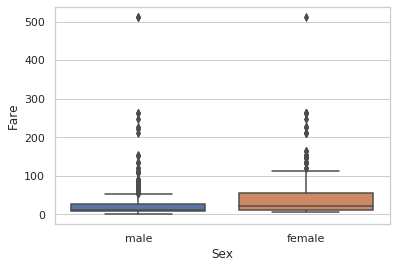

In [25]:
sns.set(style="whitegrid")

# this expression gives a Pandas boolean series of male passengers 
male_series = df_titanic['Sex']=='male'
# use this expression to create a dataframe of male passengers only
male_dataframe = df_titanic[male_series]
# select the Fare from the dataframe to create a Pandas series to plot in the boxplot
male_fare = male_dataframe['Fare']
# this can all be collapsed into one short expression:
male_fare = df_titanic[df_titanic['Sex']=='male']['Fare']

# plot male and female in the same boxplot using the short expression:
ax = sns.boxplot(       x=df_titanic['Sex'], y=df_titanic[df_titanic['Sex']=='male']['Fare'])
ax = sns.boxplot(ax=ax, x=df_titanic['Sex'], y=df_titanic[df_titanic['Sex']=='female']['Fare'])



From the box plot of the titanic male vs female fares, the females clearly paid more on average (as seen in the box), and also on the extremes (as seen in the whiskers).